# Optimal width plots

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import use_nessi as un
import os
from importlib import reload
from matplotlib import cm
import matplotlib.cbook as cbook
import matplotlib.colors as colors
from scipy.interpolate import interp1d

In [4]:
def load_opt_w_data(names_of_lines):

    data = {}
    for name in names_of_lines:  

        data["A_area_"+name] = np.load(un.get_file_path_opt_w_data("A_area_"+name))
        data["A_wavl_"+name] = np.load(un.get_file_path_opt_w_data("A_wavl_"+name))
        data["Deltas_"+name] = np.load(un.get_file_path_opt_w_data("Deltas_"+name))


    return data



lines = ["Ha17", "CaK17", "CaII17"]
long_names = {"Ha17":r"H$\alpha$", "CaK17":r'Ca$IIK$', "CaII17":r'Ca$II 8542 \AA$'}

reload(un)
data = load_opt_w_data(lines)
# disgard_cont_point("CaK17", data)
data.keys()

dict_keys(['A_area_Ha17', 'A_wavl_Ha17', 'Deltas_Ha17', 'A_area_CaK17', 'A_wavl_CaK17', 'Deltas_CaK17', 'A_area_CaII17', 'A_wavl_CaII17', 'Deltas_CaII17'])

C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_8160\1781050847.py:14: RuntimeWarning: All-NaN slice encountered
  MAX = np.nanmax(A, axis=1)


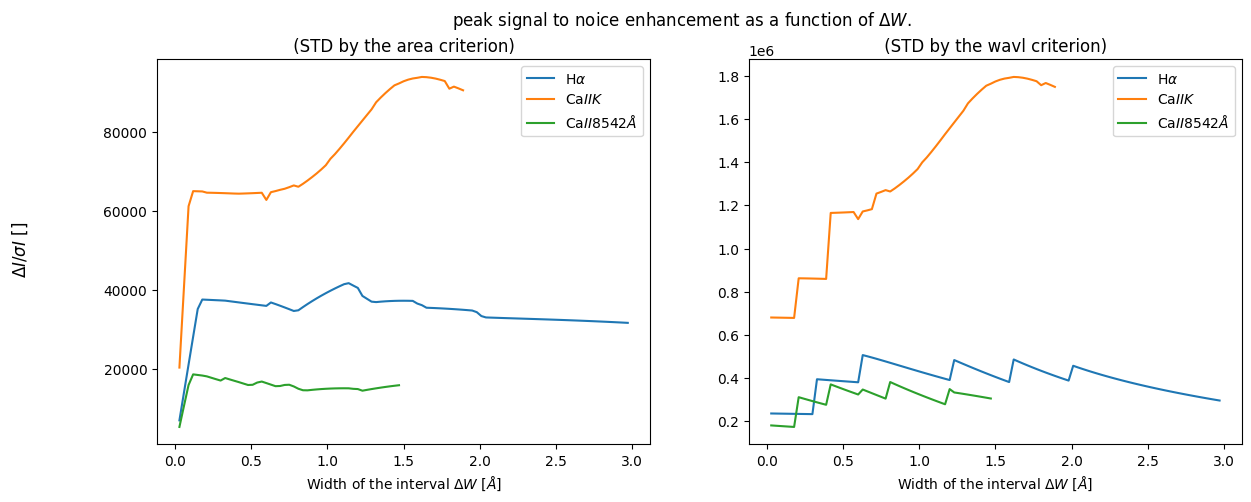

In [5]:
def plot_peak_enhancement(data, names_of_lines, long_names):
    fig, ax = plt.subplots(ncols=2, figsize=(14,5))
    fig.suptitle(r'peak signal to noice enhancement as a function of $\Delta W$.')
    fig.supylabel(r'$\Delta I/\sigma I$ []')
    ax_peak_enhancement(ax[0], data, names_of_lines, long_names, criterion='area')
    ax_peak_enhancement(ax[1], data, names_of_lines, long_names, criterion='wavl')
    plt.show()
    
    
def ax_peak_enhancement(ax, data, names_of_lines, long_names, criterion):
    for name in names_of_lines:
        A = data[f"A_area_{name}"] if criterion=="area" else data[f"A_wavl_{name}"]
        Deltas = data[f"Deltas_{name}"]
        MAX = np.nanmax(A, axis=1)
        ax.plot(Deltas, MAX, label=long_names[name])
        ax.set_title(f' (STD by the {criterion} criterion) ')
        ax.set_xlabel(r"Width of the interval $\Delta W$ $[\AA]$")

    ax.legend()

plot_peak_enhancement(data, lines, long_names)



# optimal width
With the gathered data we can also proposes a measure for a optimal filter width for flare detection. 
Calculating the total intensity in a certain bandwidth $\Delta$ around the line center divided over the standard deviation of the noise gives the signal to noise ratio over time, denoted by $f_\Delta$.
These signal to noise ratios can be varying in time relatively which then can be used to propose the most robust measure for a telescope with a given cadence $C$.
We choose the bandwidth $\Delta$ that maximizes $f_\Delta$ for some norm. 

We propose the following norms: 
let $f$ be any intensity signal to noise ratio profile over time and let $l$ be the lower threshold function for a particular instrument, that is for the lower threshold for detection $l_o$ it is defined by  $l(f) = \begin{cases} f & f\geq l_0 \\ 0 & f < l_0\end{cases}$. We call $\alpha$ the order of the norm.
For $\alpha=0$ we define
\begin{equation}
    \left\|f \right\|_{0}^C:=\sup_{\text{interval } I \text{ of length }C} \left\{\lambda\{x\in I| l(f)(x) > 0\}\right\}. 
\end{equation}
For $\alpha \geq 1$ we define
\begin{equation}
    \left\|f \right\|_{\alpha}^C:=\sup_{\text{interval } I \text{ of length }C} \left\{\left\|l(f)\right\|_{I,\alpha} \right\}. 
\end{equation}
Here the norm $\|\cdot\|_{I, \alpha} $ is defined for some function $g$ by 
\begin{equation}
    \|g\|_{I, \alpha} := \left(\frac{1}{C}\int_I |g|^\alpha \right)^{1/\alpha}.
\end{equation}
For $\alpha=\infty$ we define 
\begin{equation}
    \left\|f \right\|_{\infty}^C:=\sup l(f) = \lim_{\alpha\to\infty}\|f\|_\alpha^C. 
\end{equation}

Here different $\alpha$ give different notions of optimal width. 
* \textbf{$\alpha =0$} is the robust measure for capturing all flares without a preference for any magnitude of profile. It gives the highest probability for an observation above the threshold. 
* \textbf{$\alpha\geq 1$} yields measures that are more preferring higher intensity flares and more significant signal to noise ratios. Higher $\alpha$ yields a measure that weights heavier the higher significant peaks with higher signal to noise ratio.  
* \textbf{$\alpha=\infty$} This measure returns the bandwidth for the highest peak. It is the limit case of $\alpha \to \infty$. 


However for the flares and lines listed above the bandwidth for highest signal to noise ratio does not vary for the main part of the flares. Therefore for all cadence the same optimal bandwidth applies as all measures are almost independent of $\alpha$ and $C$. 

The measures proposed will be interesting for instruments with very low cadence and the flares where the optimal bandwidth varies substantially during the main part of the flare. This might be the case e.g. if coronal rain might be delayed substantially with respect to the start of the flare. So in the case of a later initialized line broadening it might be better for slow cadance instrument to take a broader bandwidth. However we cannot demonstrate an example

We only will calculate different measures for the most varying flare line in our data and for all others we only will calculate 


In [ ]:
from scipy.integrate import quad
from scipy.interpolate import interp1d

def calculate_weigthed_signal_to_noise(diff_spectr,  weights, std, wav):
    """
    Calculate the wheighted differential profiles over noise

    Args:
        diff_spectr ((n_time, n_wav)-numpy array): difference intencity 
        std ((n_wav)-numpy array): the standard deviations for the standard deviations
        weights (function): A function returning the weigth at any wavelength. 
        wav ((n_wav)-numpy array): the wavelength positions of the diff_spectr observations

    Returns:
        (n_time)-numpy array: DI/sigma array in time

    Raises:
    """
    DI = np.array([])
    
def weighted_diff_s_n(intensity, weights, wav):
    DI = interp1d(wav, intensity)
    
    
    

def std_weighting(weights, wav, std, option='integral'):

    # option='area' or 'wavl'
    if option=='wavl':
        f_std = lambda w : interp1d(wav, std)(w) * weights(w)
        integral_std,_ = quad(f_std , wav[0], wav[-1])
        integral_weights,_ = quad(weights, wav[0], wav[-1])
        appr_num = len(std) * integral_weights / (wav[1]-wav[0])
        
        std = integral_std / integral_weights / appr_num**0.5
        # except ValueError:
        #     stc = self.std_quiet_sun[np.where(wav <= interval[1]) & (wav >= interval[0])[0]]
        #     std = np.mean(stc) / len(stc) ** 0.5

    elif option == "sum": # just sum of normal distributions
        # sigma_sum = sqrt ( sum (sigma_i ** 2))
        std = ( np.sum( (weights(wav) * std ) ** 2 ) / np.sum( weights(wav)**2) ) ** 0.5
        
    elif option == "integral":
        f_std = lambda w : interp1d(wav, (std) **2 )(w) * weights(w) ** 2
        w2 = lambda x : weights(x)**2
        integral_std,_ = quad(f_std, wav[0], wav[-1])
        integral_weights,_ = quad(w2, wav[0], wav[-1])
        
        std = ( integral_std / integral_weights ) **0.5
        
    elif option == "area":
        print("This can only be done by providing a spatial resolution plot, calculate somewhere else.")
        std = None
    
    return std